In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.tabular import *

In [3]:
train = pd.read_csv('input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test = pd.read_csv("input/test.csv")
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
test.shape

(418, 11)

In [8]:
train['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Understanding how the NaN values in Embarked should be replaced-

In [10]:
train['Sex'].loc[train['Embarked'] == 'S'].value_counts()

male      441
female    203
Name: Sex, dtype: int64

In [11]:
train['Sex'].loc[train['Embarked'] == 'C'].value_counts()

male      95
female    73
Name: Sex, dtype: int64

In [12]:
train.loc[train['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
train.loc[(train['Embarked'] == 'S') & (train['Survived'] == 1) & (train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [14]:
train.loc[(train['Embarked'] == 'C') & (train['Survived'] == 1) & (train['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [15]:
print(str(140*100 / 203) + ' chances of a female from S embarkment to survive.')
print(str(64*100 / 73) + ' chances of a female from C embarkment to survive.')

68.96551724137932 chances of a female from S embarkment to survive.
87.67123287671232 chances of a female from C embarkment to survive.


In [16]:
# Filling with S since it's largest
train["Embarked"] = train["Embarked"].fillna("S")

test['Fare'].fillna(test['Fare'].median(), inplace = True)

## Assigning all the null values as "N"
train['Cabin'].fillna("NA", inplace=True)
test['Cabin'].fillna("NA", inplace=True)

In [17]:
print(train.isnull().sum(), test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64


In [18]:
train["Title"] = pd.Series([i.split(",")[1].split(".")[0].strip() for i in train["Name"]])
train["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [19]:
test["Title"] = pd.Series([i.split(",")[1].split(".")[0].strip() for i in test["Name"]])
test["Title"].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [20]:
grouped = train.groupby(['Sex','Pclass', 'Title'])  

In [21]:
grouped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NA,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,Master
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NA,S,Jonkheer


In [22]:
grouped['Age'].median()

Sex     Pclass  Title       
female  1       Dr              49.0
                Lady            48.0
                Miss            30.0
                Mlle            24.0
                Mme             24.0
                Mrs             41.5
                the Countess    33.0
        2       Miss            24.0
                Mrs             32.0
                Ms              28.0
        3       Miss            18.0
                Mrs             31.0
male    1       Capt            70.0
                Col             58.0
                Don             40.0
                Dr              44.0
                Jonkheer        38.0
                Major           48.5
                Master           4.0
                Mr              40.0
                Sir             49.0
        2       Dr              38.5
                Master           1.0
                Mr              31.0
                Rev             46.5
        3       Master           4.0
         

In [23]:
# apply the grouped median value on the Age NaN
train['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))

In [24]:
# Same on test
test_grouped = test.groupby(['Sex','Pclass', 'Title'])  
test_grouped['Age'].median()
test['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))

In [25]:
print(train.isnull().sum(), test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [26]:
dep_var = 'Survived'
cat_names  = ['Title', 'Sex', 'Ticket', 'Cabin', 'Embarked']
cont_names  = [ 'Age', 'SibSp', 'Parch', 'Fare']
procs = [FillMissing, Categorify, Normalize]

In [27]:
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,200)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

In [28]:
data.show_batch(rows=10)

Title,Sex,Ticket,Cabin,Embarked,Age,SibSp,Parch,Fare,target
Miss,female,24160,B5,S,-0.0465,-0.4610,-0.4658,3.3666,1
Mr,male,349224,NA,S,-0.2731,-0.4610,-0.4658,-0.4860,0
Miss,female,382649,NA,Q,-0.8774,-0.4610,-0.4658,-0.4888,0
Miss,female,F.C.C. 13531,NA,S,1.5399,-0.4610,-0.4658,-0.4367,1
Mr,male,349233,NA,S,-0.4242,-0.4610,-0.4658,-0.4860,0
Master,male,C.A. 37671,NA,S,-1.5573,0.5043,0.8064,-0.3344,1
Mr,male,29104,NA,S,-0.4997,1.4697,0.8064,-0.4178,0
Mr,male,367226,NA,Q,-0.2731,1.4697,-0.4658,-0.1952,1
Mrs,female,17466,D17,S,1.3888,-0.4610,-0.4658,-0.1445,1
Mr,male,323951,NA,S,-0.8019,-0.4610,-0.4658,-0.4831,0


In [29]:
np.random.seed(40)

In [30]:
learn = tabular_learner(data, layers=[180, 120], metrics=accuracy, emb_drop=0.1)

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


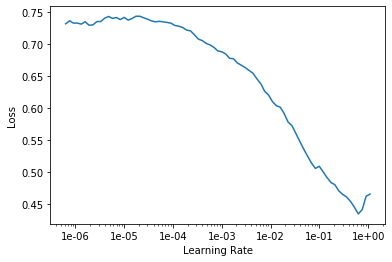

In [32]:
learn.recorder.plot()

In [33]:
learn.fit(5,slice(1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,1.377666,0.938059,0.795000,00:32
1,0.931079,1.072669,0.790000,00:32
2,0.645944,0.871566,0.790000,00:32
3,0.474218,0.744648,0.840000,00:32
4,0.360782,0.639052,0.845000,00:32


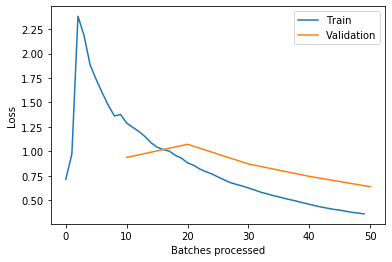

In [34]:
learn.recorder.plot_losses()

In [38]:
test_temp = pd.read_csv("input/test.csv")

In [39]:
# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

# create submission file to submit in Kaggle competition
submission = pd.DataFrame({'PassengerId': test_temp['PassengerId'] , 'Survived': labels})
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
submission.shape

(418, 2)